In [1]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

## EDA for Dashen APP Reviews

In [2]:
# Import necessary modules and packages
from scripts.utils import AppName
from scripts.sentiment_analysis import SentimentAnalysis, SentimentMethod
import pandas as pd

d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load the review data
review_data = pd.read_csv('../Data/cleaned/dashen_reviews_cleaned.csv')

#show the first few rows of the review data
review_data.head(5)

,review,rating,date,bank,source
0,this app is good for you guys,5,2025-06-09,dashen,Google Play Store
1,wow,5,2025-06-09,dashen,Google Play Store
2,kalid,5,2025-06-08,dashen,Google Play Store
3,I like this mobile banking app very much. Over...,2,2025-06-07,dashen,Google Play Store
4,love,3,2025-06-06,dashen,Google Play Store


In [4]:
# create an instance of the SentimentAnalysis class
analysis = SentimentAnalysis(review_data, AppName.DASHEN)

Checking for NLTK resources...
NLTK resources not found. Downloading...
NLTK resources downloaded.


Device set to use cpu


In [5]:
# Preprocess review text
analysis.preprocess_reviews()
review_data.head(5)

Preprocessing reviews...
Reviews preprocessed. Tokens extracted.


,review,rating,date,bank,source,processed_review
0,this app is good for you guys,5,2025-06-09,dashen,Google Play Store,app good guy
1,wow,5,2025-06-09,dashen,Google Play Store,wow
2,kalid,5,2025-06-08,dashen,Google Play Store,kalid
3,I like this mobile banking app very much. Over...,2,2025-06-07,dashen,Google Play Store,like mobile banking app much overall user inte...
4,love,3,2025-06-06,dashen,Google Play Store,love


In [6]:
# Sentiment analysis using Bert
analysis.compute_sentiment(method=SentimentMethod.BERT)
review_data.head(5)

Computing DistilBERT sentiment scores...
DistilBERT sentiment scores computed.
Sentiment results saved to ..\Data\gold\dashen_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score
0,this app is good for you guys,5,2025-06-09,dashen,Google Play Store,app good guy,positive,0.999808
1,wow,5,2025-06-09,dashen,Google Play Store,wow,positive,0.999592
2,kalid,5,2025-06-08,dashen,Google Play Store,kalid,positive,0.899888
3,I like this mobile banking app very much. Over...,2,2025-06-07,dashen,Google Play Store,like mobile banking app much overall user inte...,negative,0.998669
4,love,3,2025-06-06,dashen,Google Play Store,love,positive,0.999874


In [7]:
# Sentiment analysis using VADER
analysis.compute_sentiment(method=SentimentMethod.VADER)
review_data.head(5)

Computing VADER sentiment scores...
VADER sentiment scores computed.
Sentiment results saved to ..\Data\gold\dashen_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score,vader_score,vader_sentiment
0,this app is good for you guys,5,2025-06-09,dashen,Google Play Store,app good guy,positive,0.999808,0.4404,positive
1,wow,5,2025-06-09,dashen,Google Play Store,wow,positive,0.999592,0.5859,positive
2,kalid,5,2025-06-08,dashen,Google Play Store,kalid,positive,0.899888,0.0000,neutral
3,I like this mobile banking app very much. Over...,2,2025-06-07,dashen,Google Play Store,like mobile banking app much overall user inte...,negative,0.998669,0.6486,positive
4,love,3,2025-06-06,dashen,Google Play Store,love,positive,0.999874,0.6369,positive


In [8]:
# Sentiment analysis using Text Blob

analysis.compute_sentiment(method=SentimentMethod.TEXT_BLOB)
review_data.head(5)

Computing TextBlob sentiment scores...
TextBlob sentiment scores computed.
Sentiment results saved to ..\Data\gold\dashen_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score,vader_score,vader_sentiment,textblob_score,textblob_sentiment
0,this app is good for you guys,5,2025-06-09,dashen,Google Play Store,app good guy,positive,0.999808,0.4404,positive,0.700000,positive
1,wow,5,2025-06-09,dashen,Google Play Store,wow,positive,0.999592,0.5859,positive,0.100000,positive
2,kalid,5,2025-06-08,dashen,Google Play Store,kalid,positive,0.899888,0.0000,neutral,0.000000,neutral
3,I like this mobile banking app very much. Over...,2,2025-06-07,dashen,Google Play Store,like mobile banking app much overall user inte...,negative,0.998669,0.6486,positive,0.333333,positive
4,love,3,2025-06-06,dashen,Google Play Store,love,positive,0.999874,0.6369,positive,0.500000,positive


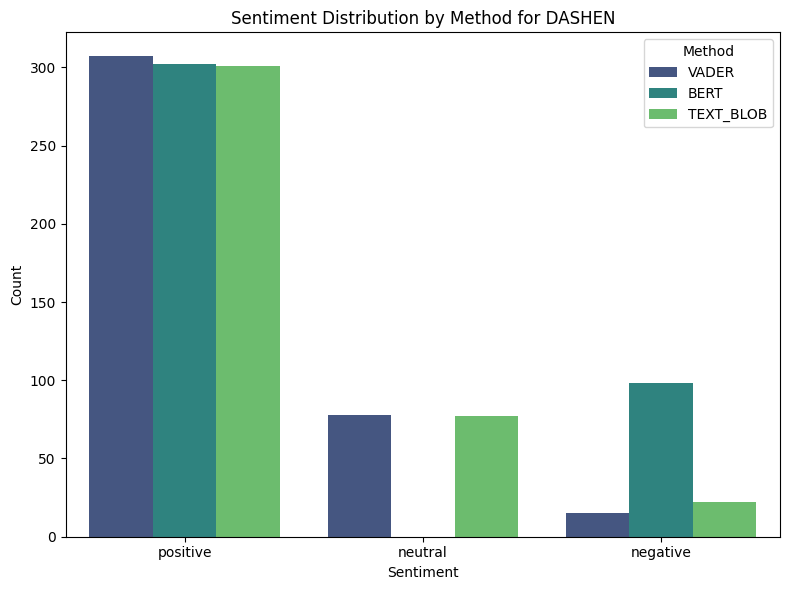

In [9]:
# Visualize sentiment distribution for all sentiment algorithms
analysis.plot_sentiment_distribution()

Top 20 keywords in positive reviews (bert):
[('app', 122), ('banking', 50), ('feature', 38), ('user', 29), ('experience', 21), ('transaction', 19), ('application', 18), ('bank', 18), ('the app', 18), ('service', 18), ('dashen bank', 17), ('payment', 14), ('this app', 13), ('changer', 13), ('game', 13), ('time', 11), ('step', 11), ('bill', 10), ('platform', 10), ('interface', 10)]

Top 20 keywords in negative reviews (bert):
[('app', 41), ('banking', 14), ('bank', 11), ('transaction', 11), ('this app', 9), ('the app', 8), ('feature', 7), ('user', 6), ('time', 6), ('payment', 6), ('application', 6), ('experience', 6), ('money', 5), ('version', 5), ('speed', 5), ('phone', 5), ('account', 4), ('customer', 4), ('chat', 4), ('developer', 4)]


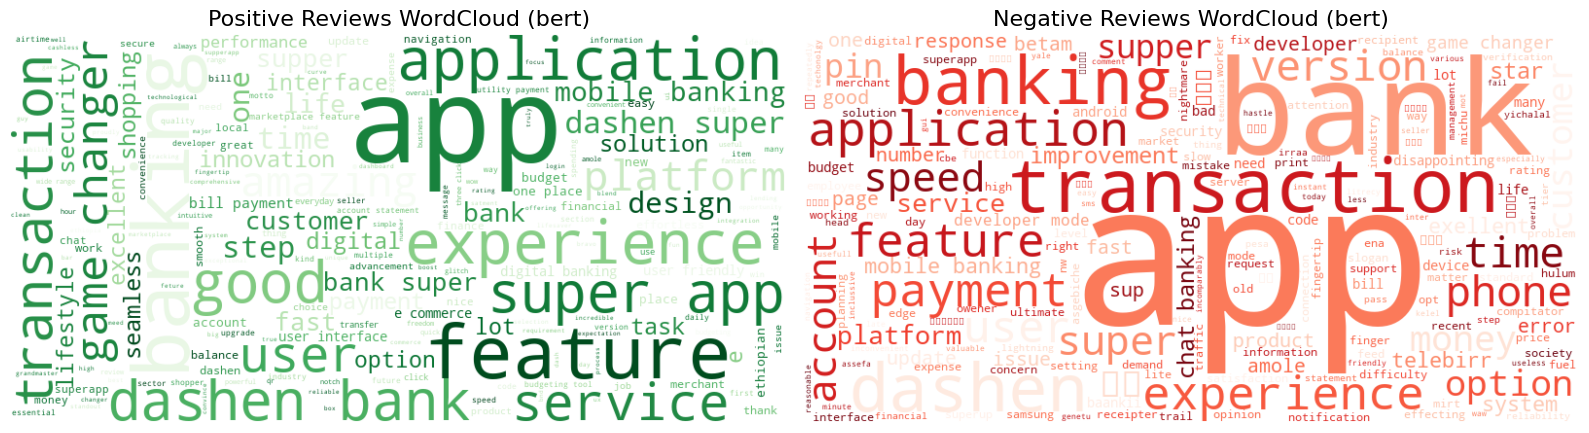

{'positive': [('app', 122),
  ('banking', 50),
  ('feature', 38),
  ('user', 29),
  ('experience', 21),
  ('transaction', 19),
  ('application', 18),
  ('bank', 18),
  ('the app', 18),
  ('service', 18),
  ('dashen bank', 17),
  ('payment', 14),
  ('this app', 13),
  ('changer', 13),
  ('game', 13),
  ('time', 11),
  ('step', 11),
  ('bill', 10),
  ('platform', 10),
  ('interface', 10)],
 'negative': [('app', 41),
  ('banking', 14),
  ('bank', 11),
  ('transaction', 11),
  ('this app', 9),
  ('the app', 8),
  ('feature', 7),
  ('user', 6),
  ('time', 6),
  ('payment', 6),
  ('application', 6),
  ('experience', 6),
  ('money', 5),
  ('version', 5),
  ('speed', 5),
  ('phone', 5),
  ('account', 4),
  ('customer', 4),
  ('chat', 4),
  ('developer', 4)]}

In [10]:
## Extract Keywords from positive and negative reviews
analysis.keyword_extraction(top_n=20, method=SentimentMethod.BERT)

In [11]:
# Extract themes from the reviews using BERT
analysis.extract_themes(method=SentimentMethod.BERT)


Top 30 keywords in positive reviews (bert):
[('app', 122), ('banking', 50), ('feature', 38), ('user', 29), ('experience', 21), ('transaction', 19), ('application', 18), ('bank', 18), ('the app', 18), ('service', 18), ('dashen bank', 17), ('payment', 14), ('this app', 13), ('changer', 13), ('game', 13), ('time', 11), ('step', 11), ('bill', 10), ('platform', 10), ('interface', 10), ('dashen super app', 10), ('e', 10), ('one place', 9), ('place', 9), ('life', 8), ('design', 8), ('customer', 8), ('account', 8), ('dashen bank super app', 7), ('shopping', 7)]

Top 30 keywords in negative reviews (bert):
[('app', 41), ('banking', 14), ('bank', 11), ('transaction', 11), ('this app', 9), ('the app', 8), ('feature', 7), ('user', 6), ('time', 6), ('payment', 6), ('application', 6), ('experience', 6), ('money', 5), ('version', 5), ('speed', 5), ('phone', 5), ('account', 4), ('customer', 4), ('chat', 4), ('developer', 4), ('option', 4), ('improvement', 4), ('pin', 3), ('dashen bank', 3), ('system',

{'Account Access Issues': [('account', 2)],
 'Transaction Performance': [('transaction', 2), ('payment', 2)],
 'User Interface & Experience': [('app', 2),
  ('application', 2),
  ('the app', 2),
  ('this app', 2),
  ('interface', 1),
  ('dashen super app', 1),
  ('design', 1),
  ('dashen bank super app', 1)],
 'Customer Support': [('service', 2)],
 'Feature Requests': [('feature', 2), ('option', 1), ('improvement', 1)],
 'Other': [('banking', 2),
  ('user', 2),
  ('experience', 2),
  ('bank', 2),
  ('dashen bank', 2),
  ('time', 2),
  ('platform', 2),
  ('customer', 2),
  ('changer', 1),
  ('game', 1),
  ('step', 1),
  ('bill', 1),
  ('e', 1),
  ('one place', 1),
  ('place', 1)]}

Top 60 keywords in positive reviews (bert):
[('app', 122), ('banking', 50), ('feature', 38), ('user', 29), ('experience', 21), ('transaction', 19), ('application', 18), ('bank', 18), ('the app', 18), ('service', 18), ('dashen bank', 17), ('payment', 14), ('this app', 13), ('changer', 13), ('game', 13), ('time', 11), ('step', 11), ('bill', 10), ('platform', 10), ('interface', 10), ('dashen super app', 10), ('e', 10), ('one place', 9), ('place', 9), ('life', 8), ('design', 8), ('customer', 8), ('account', 8), ('dashen bank super app', 7), ('shopping', 7), ('innovation', 7), ('good app', 7), ('the dashen super app', 7), ('money', 6), ('task', 6), ('solution', 6), ('thank', 6), ('security', 6), ('click', 5), ('lifestyle', 5), ('effortless', 5), ('a lot', 5), ('lot', 5), ('budget', 5), ('a game-changer', 5), ('option', 5), ('supper', 5), ('navigation', 5), ('budgeting', 5), ('performance', 5), ('balance', 5), ('convenience', 4), ('the good app', 4), ('finance', 4), ('amazing app', 4), ('bil

d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\scripts\sentiment_analysis.py:341: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts), y=list(sorted_themes), palette='viridis')


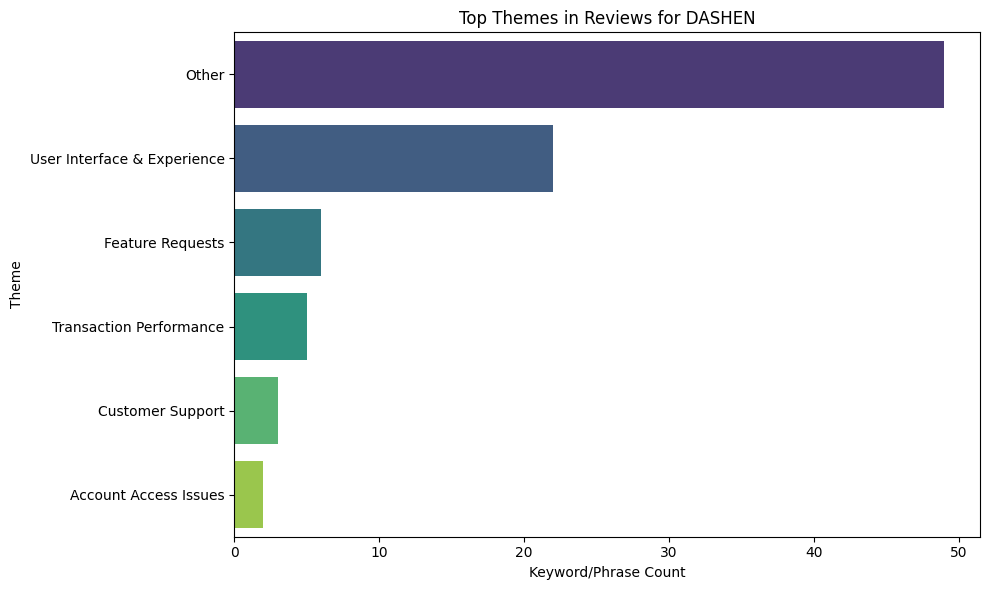

In [12]:
## Visualize the themes
analysis.plot_theme_map(top_n=30, method=SentimentMethod.BERT)